## 1. Preparation of materials to work with the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Libraries to work with the data.

In [3]:
# Importing the Data
df = pd.read_csv(r"C:\Users\Nigel K. Rodrigues\Desktop\Misc\GitHub\Flight-Price-Prediction\Clean_Dataset.csv")
    
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


## 2. Data Exploration

### 2.1 Identification of data

In [5]:
print(df.shape)  # Shape of the data
print()
print(df.info())      # Ckecking null values and the data types

(300153, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [6]:
df = df.iloc[:,1:]  # Removing manual sr.no. column (Unnamed)

print(df.nunique())  # Checking number of unique values in each column 


airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64


### 2.2 Differences in prices based on Airlines

In [26]:
# Average price by Class Type
Avg_class_p = df.groupby(by = 'class')['price'].mean()
print(Avg_class_p)


class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64


In [7]:
# Average price of airlines by class type
a_class_p = df.groupby(by = ['airline','class'])['price'].mean()
print(a_class_p)


airline    class   
AirAsia    Economy      4091.072742
Air_India  Business    47131.039212
           Economy      7313.682169
GO_FIRST   Economy      5652.007595
Indigo     Economy      5324.216303
SpiceJet   Economy      6179.278881
Vistara    Business    55477.027777
           Economy      7806.943645
Name: price, dtype: float64


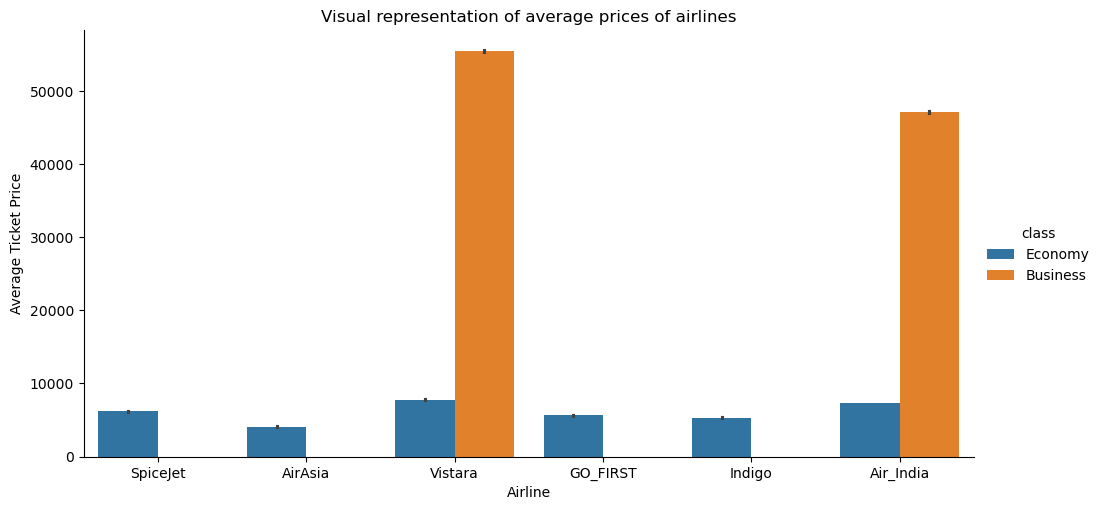

In [66]:
# Bar plot to represent the avg price of airlines
bar_plot = sns.catplot(data=df, kind='bar', x='airline', hue='class', y='price', height=5, aspect=2)
plt.ylabel('Average Ticket Price')
plt.xlabel('Airline')
plt.title("Visual representation of average prices of airlines")

plt.show()

As seen from the above graph we can interpret the following points:

* All airlines have minor differences in the prices of the economy class tickets.
* Only 2 of the 6 airlines offer business class services (Vistra, Air_India).
* The prices of business class tickets are much higher than that of economy class.
* The average prices of Vistara Business class tickets are 55477.027777
* The average prices of Air_India Business class tickets are 47131.039212
* From the previous 2 points we can observe that Vistara's business class tickets have the highest average price.